## 3D Plots

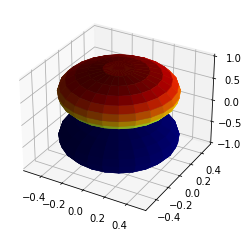

In [1]:
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

def sph2cart(r, phi, tta):
   ''' r is from 0 to infinity '''
   ''' phi is from 0 to 2*pi '''
   ''' tta is from 0 to pi '''
   x = r* np.sin(tta)* np.cos(phi)
   y = r* np.sin(tta)* np.sin(phi)
   z = r* np.cos(tta)
   return x, y, z

# phi running from 0 to pi and tta from 0 to pi
phi = np.linspace(0, 2* np.pi, 25)
tta = np.linspace(0, np.pi, 25)
# meshgrid to generate points
phi, tta = np.meshgrid(phi, tta)

# THIS IS THE FUNCTION
Y = np.cos(tta)
# finally all things in cartesian co-ordinate system
# Note that "Y" is acting as "r"
x, y, z = sph2cart(np.abs(Y), phi, tta)

fig = plt.figure()
ax = fig.add_subplot( 111 , projection='3d')

from matplotlib import cm
ax.plot_surface(x, y, z, linewidth = 0.5, facecolors = cm.jet(Y), edgecolors = 'k')

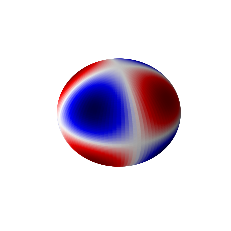

In [2]:
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.special import sph_harm

phi = np.linspace(0, np.pi, 100)
theta = np.linspace(0, 2*np.pi, 100)
phi, theta = np.meshgrid(phi, theta)

# The Cartesian coordinates of the unit sphere
x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)

m, l = 2, 3

# Calculate the spherical harmonic Y(l,m) and normalize to [0,1]
fcolors = sph_harm(m, l, theta, phi).real
fmax, fmin = fcolors.max(), fcolors.min()
fcolors = (fcolors - fmin)/(fmax - fmin)

# Set the aspect ratio to 1 so our sphere looks spherical
fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.seismic(fcolors))
# Turn off the axis planes
ax.set_axis_off()
plt.show()

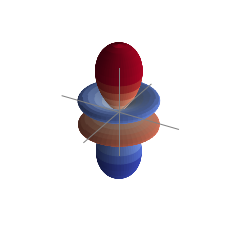

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# The following import configures Matplotlib for 3D plotting.
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import sph_harm
plt.rc('text', usetex=True)

# Grids of polar and azimuthal angles
theta = np.linspace(0, np.pi, 100)
phi = np.linspace(0, 2*np.pi, 100)
# Create a 2-D meshgrid of (theta, phi) angles.
theta, phi = np.meshgrid(theta, phi)
# Calculate the Cartesian coordinates of each point in the mesh.
xyz = np.array([np.sin(theta) * np.sin(phi),
                np.sin(theta) * np.cos(phi),
                np.cos(theta)])

def plot_Y(ax, el, m):
    """Plot the spherical harmonic of degree el and order m on Axes ax."""

    # NB In SciPy's sph_harm function the azimuthal coordinate, theta,
    # comes before the polar coordinate, phi.
    Y = sph_harm(abs(m), el, phi, theta)

    # Linear combination of Y_l,m and Y_l,-m to create the real form.
    if m < 0:
        Y = np.sqrt(2) * (-1)**m * Y.imag
    elif m > 0:
        Y = np.sqrt(2) * (-1)**m * Y.real
    Yx, Yy, Yz = np.abs(Y) * xyz

    # Colour the plotted surface according to the sign of Y.
    cmap = plt.cm.ScalarMappable(cmap=plt.get_cmap('coolwarm'))
    cmap.set_clim(-0.5, 0.5)

    ax.plot_surface(Yx, Yy, Yz,
                    facecolors=cmap.to_rgba(Y.real),
                    rstride=2, cstride=2)

    # Draw a set of x, y, z axes for reference.
    ax_lim = 0.5
    ax.plot([-ax_lim, ax_lim], [0,0], [0,0], c='0.5', lw=1, zorder=10)
    ax.plot([0,0], [-ax_lim, ax_lim], [0,0], c='0.5', lw=1, zorder=10)
    ax.plot([0,0], [0,0], [-ax_lim, ax_lim], c='0.5', lw=1, zorder=10)
    # Set the Axes limits and title, turn off the Axes frame.
    ax.set_title(r''.format(el, m))
    ax_lim = 0.5
    ax.set_xlim(-ax_lim, ax_lim)
    ax.set_ylim(-ax_lim, ax_lim)
    ax.set_zlim(-ax_lim, ax_lim)
    ax.axis('off')

fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(projection='3d')
l, m = 3, 0
plot_Y(ax, l, m)
plt.savefig('Y{}_{}.png'.format(l, m))
plt.show()

0 0
1 -1
1 0
1 1
2 -2
2 -1
2 0
2 1
2 2
3 -3
3 -2
3 -1
3 0
3 1
3 2
3 3


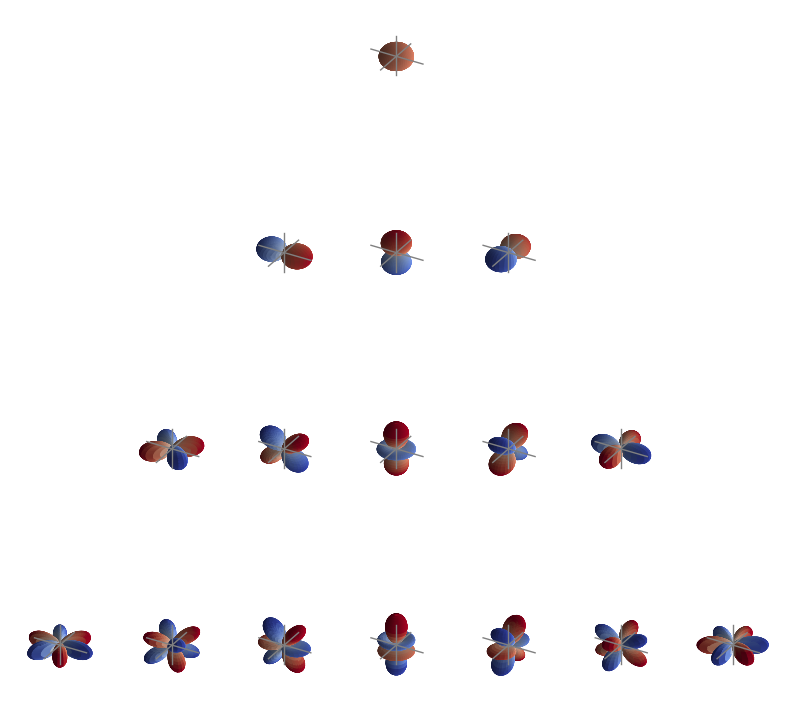

In [4]:
el_max = 3
figsize_px, DPI = 800, 100
figsize_in = figsize_px / DPI
fig = plt.figure(figsize=(figsize_in, figsize_in), dpi=DPI)
spec = gridspec.GridSpec(ncols=2*el_max+1, nrows=el_max+1, figure=fig)
for el in range(el_max+1):
    for m_el in range(-el, el+1):
        print(el, m_el)
        ax = fig.add_subplot(spec[el, m_el+el_max], projection='3d')
        plot_Y(ax, el, m_el)
plt.tight_layout()
plt.savefig('sph_harm.png')
plt.show()